Using a NN to train. One hidden layer

https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ann_logistic_extra/ann_train.py

In [1]:
%run 'ECommerce.ipynb' #runs the notebook with the data prep work

[[ 1.          0.          0.65750995  0.          3.          0.        ]
 [ 1.          1.          0.56857123  0.          2.          1.        ]
 [ 1.          0.          0.042246    1.          1.          0.        ]
 ..., 
 [ 0.          0.          0.1728534   1.          3.          0.        ]
 [ 1.          0.          0.2099644   0.          3.          0.        ]
 [ 0.          0.          2.61688195  1.          3.          0.        ]]
(500L, 5L)
(500L,)
[[ 1.         -1.89931526 -1.37410378 ...,  0.          0.          1.        ]
 [ 1.         -0.89931526 -1.46304249 ...,  0.          1.          0.        ]
 [ 1.         -1.89931526 -1.98936773 ...,  1.          0.          0.        ]
 ..., 
 [ 0.         -1.89931526 -1.85876033 ...,  0.          0.          1.        ]
 [ 1.         -1.89931526 -1.82164933 ...,  0.          0.          1.        ]
 [ 0.         -1.89931526  0.58526823 ...,  0.          0.          1.        ]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle

In [22]:
#Need a function to get the indicator matrix from the targets. This takes the column of 0,1,2,3 and transforms into a one-hot 
#encoded matrix 

def y2indicator(y, K):
    N = len(y) #for training this will be 400
    ind = np.zeros((N,K)) #creates a 400x4 matrix
    for i in xrange(N):
        ind[i, y[i]] = 1
    return ind

In [23]:
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32) #No decimal places

M = 5 #hidden layer units

D = X.shape[1] #8
K = len(set(Y)) #4

In [24]:
#Split the data between train and test sets

Xtrain = X[:-100]
Ytrain = Y[:-100]

Ytrain_ind = y2indicator(Ytrain, K) #One hot encoded. 400x4 (NxK)

Xtest = X[-100:]
Ytest = Y[-100:]

Ytest_ind = y2indicator(Ytest, K)

In [25]:
#Initialize some weights.

W1 = np.random.rand(D, M)
b1 = np.zeros(M)
W2 = np.random.rand(M, K)
b2 = np.zeros(K)

In [26]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1) #hidden layer calc
    return softmax(Z.dot(W2) + b2), Z #return values of hidden units to be used with the derivative

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY): #from definition
    return -np.mean(T*np.log(pY))

0 0.305991346299 0.343331842103
1000 0.0224564568477 0.0358605068276
2000 0.0172545125829 0.0260163440248
3000 0.0157028453164 0.0261255840239
4000 0.0148635551215 0.027448987055
5000 0.0142436035343 0.028978772964
6000 0.0128571941122 0.030453973748
7000 0.0111252614978 0.0333615649756
8000 0.00983646702608 0.0358811143188
9000 0.00889909133049 0.0382616851183
Final train classification_rate: 0.99
Final test classification_rate: 0.96


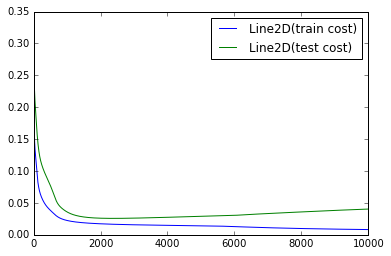

In [31]:
#Now to set up training loops
train_costs = []
test_costs = []
learning_rate = 0.001

for i in xrange(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2) #pYtrain is 400x4 (NxK), Ztrain is 400x5 (NxM)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    #Now to calculate the cost function
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    
    #append to lists
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    #gradient descent
    W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind) #ah makes sense. 
    b2 -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    
    #We can do a dz
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1-Ztrain*Ztrain)
    
    W1 -= learning_rate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    
    if i % 1000 == 0:
        print i, ctrain, ctest
        
print "Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain))
print "Final test classification_rate:", classification_rate(Ytest, predict(pYtest))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')

plt.legend([legend1, legend2])
plt.show()   

In [14]:
pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)

In [15]:
pYtrain

array([[ 0.23069639,  0.38627038,  0.23750637,  0.14552686],
       [ 0.22646867,  0.43116859,  0.21316878,  0.12919395],
       [ 0.23677606,  0.36070102,  0.23222956,  0.17029337],
       ..., 
       [ 0.2196887 ,  0.3371547 ,  0.23624554,  0.20691107],
       [ 0.22178079,  0.43835562,  0.21944423,  0.12041936],
       [ 0.22647543,  0.44068492,  0.21472163,  0.11811802]])

In [16]:
pYtrain.shape

(400L, 4L)

In [18]:
Ztrain.shape

(400L, 5L)

In [20]:
Ytrain_ind.shape

(400L, 4L)